
# Neuronale Netze von Grund auf

In dieser Übung wollen wir uns mit der Programmierung eines eigenens Neuronalen Netzes mittels numpy beschäftigen um uns ein bisschen besser mit den Grundelementen auseindanderzusetzen. Später werden wir ein kleines Klassifkiationsproblem mit Pytorch anschauen.


Zuerst importieren wir wieder alle Pakete, welche wir für diese Aufgabe benötigen

- [numpy](www.numpy.org) ist eine Bibliothek für numerische Berechnungen
- [matplotlib](http://matplotlib.org) ist eine Bibliothek zum Erstellen von Plots

Zuletzt setzen wir den numpy Seed um deterministisches Verhalten zu erhalten.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# Ablauf des Lernverfahrens

Prinzipiell besteht unsere Optimierung aus folgenden Schritten


1.   Initialisierung der Parameter $W_{i,j},b_j$
2.   Iterationsschritt mit Berechnung des Ausgangs $y$, $\epsilon$ und Cachen von Zwischenergebnissen (Forward Pass)
3.   Iterationsschritt mit Bestimmung des Gradienten $dW_{i,j}, db_j$ bezüglich der einzelnen Parameter
4.   Parameterupdate
5.   Wiederhole bis Abbruchkriterium erfüllt (hier Anzahl an Trainingsepochen erreicht)


Wir werden zuerst einige Hilfsfunktionen für ein einfaches 2-Layer Perceptron implementieren. Danach werden wir das ganze für n-Layer verallgemeinern und das neuronale Netz als eigenes Objekt betrachten.


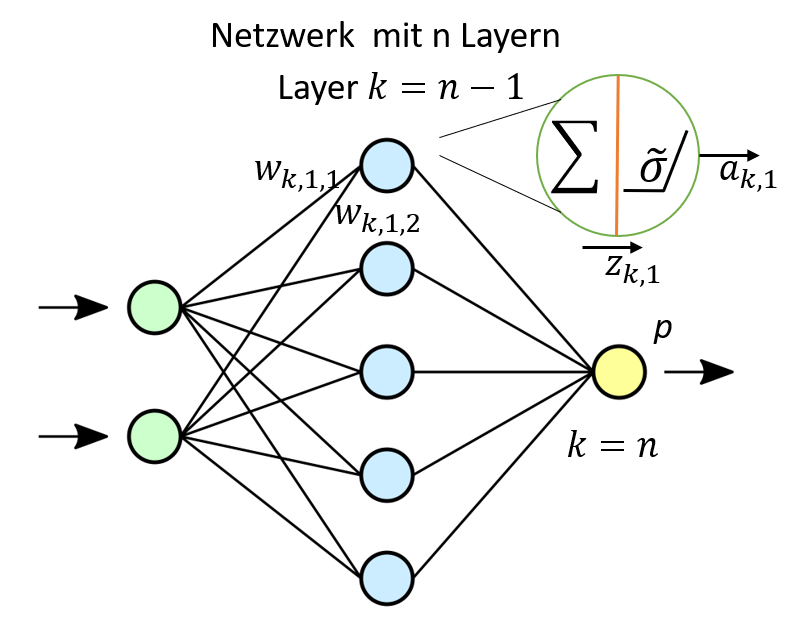

# Aufgabe 1: Hier ist der Stift gefragt

Wir nehmen an wir haben die oben visualisierte Netzform mit $n$ Layern (ein Multilayer-Perzeptron) mit ReLU Aktivierung in den tiefen Layern und Sigmoid Aktivierung in der Ausgabeschicht vorliegen. Der Ausgang ist eine Wahrscheinlichkeit $p$ und der Eingang für die folgende Aufgabe unerheblich.

Zur Notation. Für jede Schicht $k$ gibt es eine Gewichtsmatrik $\mathbf{W}_k=\left[ {\begin{array}{ccc}
    w_{k,1,1} & w_{k,1,2} & ...\\
    w_{k,2,1} & w_{k,2,2}  & ...\\
    \vdots    & \vdots     &\ddots
  \end{array} } \right]$ mit Gewichten $w_{kji}$ für den $i$-ten Eingang des $j$-ten Neurons und einen Biasvektor $\mathbf{b}_k = \left[ {\begin{array}{c}
    b_{k,1}  \\
    b_{k,2}  \\
    \vdots    
  \end{array} } \right]$ mit Biases $b_{kj}$.

Berechne die Gradienten $\frac{∂L}{∂w_{k,j,i}}$ für die Gewichte $w_{n,j,i},w_{n-1,j,i}$ der letzten beiden Layer des gegebenen Netzes mittels Backpropagation (Kettenregel). Berechne außerdem $\frac{∂L}{∂a_{n-2,i}}$. Die Kostenfunktion ist gegeben durch die Binary Cross Entropy

$L_{\text{BLE}} = -y\log(p)-(1-y)\log(1-p)$, wobei $p$ die Ausgabe des letzten Neurons ist und $y$ das gegebene wahre Label.

*Tipp*: Berechne zuerst $\frac{∂L}{∂\mathbf{z}_n}$, also die die Ableitung der Loss-Funktion nach dem Ausgang der letzten linearen Funktion. Der Ergebnisterm sollte zusammengefasst lediglich die Differenz von 2 Größen sein. Denke auch daran die Berechnungen so aufzustellen, dass vorherige Berechnungen wieder verwendet werden können.

Sigmoid: $\sigma(x) = \frac{1}{1+\mathrm{e}^{-x}}$

Reminder: Die Kettenregel bei der partiellen Ableitungen einer Funktion $f(u,v)$ lautet $\frac{∂f}{∂t}= \frac{∂f}{∂u}\frac{∂u}{∂t}+\frac{∂f}{∂v}\frac{∂v}{∂t}$

## Lösung


$\frac{\mathrm{d}L}{\mathrm{d}p} = -\frac{y}{p}+\frac{1-y}{1-p} $

$\frac{\mathrm{d}p}{\mathrm{d}z_n} = -\frac{\mathrm{e}^{-z_n}}{(1+\mathrm{e}^{-z_n})^2} =(\frac{1}{1+\mathrm{e}^{-z_n}}) (\frac{\color{green}{+1}+\mathrm{e}^{-z_n}\color{red}{-1}}{1+\mathrm{e}^{-z_n}}) = \sigma(z_n)(1-\sigma(z_n)) = p(1-p)$

$\frac{\mathrm{d}L}{\mathrm{d}z_n} = \frac{\mathrm{d}L}{\mathrm{d}p} \frac{\mathrm{d}p}{\mathrm{d}z_n} = p-y$

Der lineare Teil einer Schicht lässt sich so ausschreiben:

$\mathbf{z} = \mathbf{W}\mathbf{a}+\mathbf{b} ⇔ z_j = \sum w_{j,i}a_i + b_j $

Def. $\frac{∂L}{∂\mathbf{z}_k}=\left[ {\begin{array}{ccc}
    \frac{∂L}{∂z_{k,1}} \\
    \frac{∂L}{∂z_{k,2}} \\
    \vdots    
  \end{array} } \right]$

Def. $\frac{∂L}{∂\mathbf{W}_k}=\left[ {\begin{array}{ccc}
    \frac{∂L}{∂w_{k,1,1}} & \frac{∂L}{∂w_{k,1,2}} & ...\\
    \frac{∂L}{∂w_{k,2,1}} & \frac{∂L}{∂w_{k,2,2}}  & ...\\
    \vdots    & \vdots     &\ddots
  \end{array} } \right]$

Angenommen wir kennen für eine beliebige Schicht das "Signal" $\frac{\mathrm{d}L}{\mathrm{d}\mathbf{z}_k}$ aus der vorherigen Schicht, so können wir mittels Kettenregel einfach die Gradienten bestimmen und als vektorisierte Vorschrift schreiben:

$\frac{∂L}{∂a_{k-1,i}} = \frac{∂L}{∂z_{k,1}}\frac{∂z_{k,1}}{∂a_{k-1,i}} + \frac{∂L}{∂z_{k,2}}\frac{∂z_{k,2}}{∂a_{k-1,i}} + \frac{∂L}{∂z_{k,3}}\frac{∂z_{k,3}}{∂a_{k-1,i}} + ... = \frac{∂L}{∂z_{k,1}}w_{k,1,i} + \frac{∂L}{∂z_{k,2}}w_{k,2,i} + \frac{∂L}{∂z_{k,3}}w_{k,3,i} + ... ⟹ \frac{∂L}{∂\mathbf{a}_{k-1}} = \mathbf{W}_k^\mathrm{T}\frac{\mathrm{d}L}{\mathrm{d}\mathbf{z}_k}$

$\frac{∂L}{∂w_{k,j,i}} = \frac{∂L}{∂z_{k,1}}\frac{∂z_{k,1}}{∂w_{k,j,i}} + \frac{∂L}{∂z_{k,2}}\frac{∂z_{k,2}}{∂w_{k,j,i}} + ... = \frac{∂L}{∂z_{k,j}}\frac{∂z_{k,j}}{∂w_{k,j,i}} = \frac{∂L}{∂z_{k,j}}a_{k,i} ⟹ \frac{∂L}{∂\mathbf{W}_k} = \frac{\mathrm{d}L}{\mathrm{d}z_k}\mathbf{a}_k^\mathrm{T}$

Damit ergeben sich auch die oben gefragten Gradienten.


# Aufgabe 2: Initialisierung

Das 2-Layer-Perzeptron ist darstellbar als eine Funktion $y = f(x|\mathbf{W}_1,b_1,\mathbf{W}_2,b_2)$. Zuerst müssen die Parameter initialisiert werden. Die Art der Initialisierung ist dabei nicht egal, sondern spielt eine wichtige Rolle bei der Konvergenz der Optimierung. Es gibt verschiedene Verfahren die Parameter zu initialisieren (z.B. Konstanten, Gleichverteilte Zufallsvariablen, Normalverteilte Zufallsvariablen). Wichtig ist dabei vor allem, dass die einzelnen Parameter leicht unterschiedlich sind und keine Symmetrie im Netzwerk mehr besteht, wie es bei der Initialisierung der Gewichte mit $0$ der Fall wäre. Da bei einem vollständig verbundenen Netz alle Neuronen gleichermaßen von den Eingängen abhängen, könnten diese sich bei der Optimierung lediglich in die gleiche Richtung verändern und würden niemals voneinander abweichen. Die sogennante *He*-Initialisierung eignet sich beispielsweise gut für Netze mit *ReLU*-Aktivierungsfunktion: $w_i \sim \mathcal{N}(\mu=0,\sigma=\sqrt{(2/n)}$

Wir beschränken uns in der Übung auf die zufällige Initialisierung von $\mathbf{W}$ mit kleinen Werten und der Initialisierung von $\mathbf{b}$ mit Nullen, da das in der Regel gut funktioniert.

Ergänze die Initialisierung für das 2-Layer-Perzeptron

In [ ]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argumente:
    n_x -- Größe des Input-Layers
    n_h -- Größe des Hidden-Layers
    n_y -- Größe des Output-Layers

    Returns:
    parameters -- python dictionary mit den Parametern:
                    W1 -- weight Matrix der From (n_h, n_x)
                    b1 -- bias Vektor der Form (n_h, 1)
                    W2 -- weigth Matrix der Form (n_y, n_h)
                    b2 -- bias Vektor der Form (n_y, 1)
    """

    # --- DEIN CODE ---

    W1 = np.random.randn(n_h, n_x) *2/ np.sqrt(n_x)
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y, n_h) *2/ np.sqrt(n_h)
    b2 = np.zeros((n_y,1))


    # -----------------

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

# Aufgabe 3: Aktivierungsfunktionen

Als Aktivierungsfunktionen wollen wir Sigmoid und ReLU implementieren. Für den Backward-Schritt brauchen wir später auch die Ableitungen.
Achte darauf, dass die Eingänge Vektoren sind.

Die Ableitung der Loss-Funktion nach einer Variablen $\mathbf{x}$ (Vektor) ,  $\dfrac{\mathrm{d}L}{\mathrm{d}\mathbf{x}}$, ist im folgenden im Code immer mit `dx` bezeichnet.

In [ ]:
def sigmoid(Z):
    """
    numpy-Implementierung der sigmoid-Funktion

    Arguments:
    Z -- ndarray

    Returns:
    A -- Ausgang von sigmoid(Z), gleiche Dimensionen wie Z
    cache -- cached Z, nützlich während backpropagation
    """

    # --- DEIN CODE ---

    A = 1/(1+np.exp(-Z))
    cache = Z

    # -----------------

    return A, cache

def relu(Z):
    """
    numpy-Implementierung der ReLU-Funktion

    Arguments:
    Z -- ndarray

    Returns:
    A -- Ausgang von relu(Z), gleiche Dimensionen wie Z
    cache -- cached Z, nützlich während backpropagation
    """

    # --- DEIN CODE ---

    A = np.maximum(0,Z)

    assert(A.shape == Z.shape)
    cache = Z

    # -----------------

    return A, cache


def relu_backward(dA, cache):
    """
    Implementiert backward propagation für einzelne RELU Einheit.

    Arguments:
    dA -- post-activation gradient, beliebige Dimensionen
    cache -- 'Z' für effiziente backward propagation

    Returns:
    dZ -- Gradient der Kostenfunktion bezüglich Z
    """

    # --- DEIN CODE ---

    Z = cache
    dZ = np.array(dA, copy=True) # Einheitsabbildung.

    # Wenn z <= 0, muss dz ebenfalls <0 sein.
    dZ[Z <= 0] = 0
    assert (dZ.shape == Z.shape)

    # -----------------

    return dZ

def sigmoid_backward(dA, cache):
    """
    Implementiert backward propagation für einzelne RELU Einheit.

    Arguments:
    dA -- post-activation gradient, beliebige Dimensionen
    cache -- 'Z' für effiziente backward propagation

    Returns:
    dZ -- Gradient der Kostenfunktion bezüglich Z
    """

    # --- DEIN CODE ---

    Z = cache

    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)

    assert (dZ.shape == Z.shape)

    # -----------------

    return dZ


# Aufgabe 3: Forward-Step

Implementiere den Forward Schritt eines Netzwerks  mit zwei Layern und ReLU- bzw. Sigmoid-Aktivierungsfunktionen.

Speichere wichtige Variablen zur späteren Verwendung im Backward-Schritt im Tuple `cache`.

In [ ]:
def forward(X,parameters):
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  # --- DEIN CODE ---

  A1,Z1 = relu(np.dot(W1,X)+b1)
  A2,Z2 = sigmoid(np.dot(W2,A1)+b2)

  # -----------------

  cache = (X,W1,b1,Z1,A1,W2,b2,Z2)
  return A2, cache


# Aufgabe 5: Backward-Step

Implementiere den Backward-Schritt des oben genannten Netzes. `dA2` bezeichnet hier immer $\dfrac{\mathrm{d}L}{\mathrm{d}\mathbf{a}_2}$

Nutze die Herleitung aus Aufgabe 1. Bedenke, dass mehr als ein Datenpunkt parallel verarbeitet werden kann.

In [ ]:
def backward(dA2,cache):

  # --- DEIN CODE ---

  X,W1,b1,Z1,A1,W2,b2,Z2 = cache

  dZ2 = sigmoid_backward(dA2,Z2)
  dA1 = np.dot(W2.T,dZ2)
  dW2 = np.dot(dZ2,A1.T)
  db2 = np.sum(dZ2,axis=1,keepdims=True)
  dZ1 = relu_backward(dA1,Z1)
  dW1 = np.dot(dZ1,X.T)
  db1 = np.sum(dZ1,axis=1,keepdims=True)

  # -----------------

  grads = {"dW1":dW1,"db1":db1,"dW2":dW2,"db2":db2}

  return grads


Hier kannst du deine Funktionen aus den letzten Aufgaben testen.

In [ ]:
# Test
np.random.seed(42)
X = np.array((0.2,0.4,0.5,0.8)).reshape(2,2)
dA2 = np.array((0.2,0.4)).reshape(1,2)

parms = initialize_parameters(2,3,1)
A2, cache = forward(X,parms)

grads = backward(dA2,cache)
print(grads)

{'dW1': array([[0.04184491, 0.09019655],
       [0.02033497, 0.04383194],
       [0.        , 0.        ]]), 'db1': array([[0.13714588],
       [0.06664745],
       [0.        ]]), 'dW2': array([[0.00644785, 0.12755678, 0.        ]]), 'db2': array([[0.0752095]])}


```
{'dW1': array([[0.04184491, 0.09019655],
       [0.02033497, 0.04383194],
       [0.        , 0.        ]]), 'db1': array([[0.13714588],
       [0.06664745],
       [0.        ]]), 'dW2': array([[0.00644785, 0.12755678, 0.        ]]), 'db2': array([[0.0752095]])}
```






# Aufgabe 6: Multilayer-Perzeptron als Modul *(Optional)*

Die oben hergeleiteten Schritte sollen nun als ein einziges Modell-Objekt implementiert werden und zwar für ein Multilayer-Perzeptron mit einer beliebigen Anzahl von Layern.
Die Struktur haben wir bereits grob vorgeben.

In [ ]:
class L_Layer_Perceptron:
  '''
  Implementiert ein Multilayer Perzeptron Modell mit Gewichten W,b und L Layern
  layer_dims: List[int] Anzahl der Neuronen pro Layer
  '''
  def __init__(self,layer_dims):
    self.layer_dims = layer_dims
    self.parameters=dict()
    self.recent_output=0
    self.caches=None
    self.recent_grads=None

  def init_params(self):
    L = len(self.layer_dims) # Anzahl der Layer im Perzeptron

    for l in range(1, L):
        #self.parameters['W'+str(l)] = np.random.randn(self.layer_dims[l],self.layer_dims[l-1])*0.01  ## alternative Initialisierung
        #self.parameters['W'+str(l)] = np.random.randn(self.layer_dims[l],self.layer_dims[l-1])
        self.parameters['W' + str(l)] = np.random.randn(self.layer_dims[l], self.layer_dims[l-1]) *2/ np.sqrt(self.layer_dims[l-1])
        self.parameters['b'+str(l)] = np.zeros((self.layer_dims[l],1))

        assert(self.parameters['W' + str(l)].shape == (self.layer_dims[l], self.layer_dims[l - 1]))
        assert(self.parameters['b' + str(l)].shape == (self.layer_dims[l], 1))

  def _single_linear_forward(self,A, W, b):
    Z = np.dot(W,A)+b
    cache = (A, W, b)
    return Z, cache

  def _single_activation_forward(self,A_prev, W, b, activation):
    if activation == "sigmoid":
        Z, linear_cache = self._single_linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)

    elif activation == "relu":
        Z, linear_cache = self._single_linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
    cache = (linear_cache, activation_cache)

    return A, cache

  def _single_linear_backward(self,dZ, cache):

    A_prev, W, b = cache

    dW = np.dot(dZ,A_prev.T)
    db = np.sum(dZ,axis=1,keepdims=True)
    dA_prev = np.dot(W.T,dZ)


    return dA_prev, dW, db

  def _single_activation_backward(self,dA, cache, activation):
    linear_cache, activation_cache = cache

    if activation == "relu":
        dZ = relu_backward(dA,activation_cache)
        dA_prev, dW, db = self._single_linear_backward(dZ,linear_cache)


    elif activation == "sigmoid":

        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db = self._single_linear_backward(dZ,linear_cache)


    return dA_prev, dW, db

  def forward_step(self,x): #return function value
    caches = []
    A = x
    L = len(self.parameters) // 2                  # Anzahl der Layer im NN

    # Die For-Schleife startet bei 1, da 0 dem Eingang entspricht
    for l in range(1, L):
        A_prev = A

        A, cache = self._single_activation_forward(A_prev,self.parameters['W'+str(l)],self.parameters['b'+str(l)],'relu')
        caches.append(cache)

    output, cache = self._single_activation_forward(A,self.parameters['W'+str(L)],self.parameters['b'+str(L)],'sigmoid')
    caches.append(cache)

    self.caches = caches
    self.recent_output=output

    return output

  def backward_step(self,dAL): #gibt gradient zurück
    grads = {}
    caches = self.caches
    L = len(caches) # Anzahl der Layer im NN




    # L-ter Layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    dA_prev_temp, dW_temp, db_temp = self._single_activation_backward(dAL,current_cache,'sigmoid')
    grads["dA"+str(L-1)] = dA_prev_temp
    grads["dW"+str(L)] = dW_temp
    grads["db"+str(L)] = db_temp


    # Loop von l=L-2 bis l=0
    for l in reversed(range(L-1)):
        # l-ter layer: (RELU -> LINEAR) Gradienten.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)]
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = self._single_activation_backward(dA_prev_temp,current_cache,'relu')
        grads["dA"+str(l)] = dA_prev_temp
        grads["dW"+str(l+1)] = dW_temp
        grads["db"+str(l+1)] = db_temp


    return grads




In [ ]:
# Vergleiche mit Ausgabe des vorherigen 2 Layer Netzes
np.random.seed(42)
X = np.array((0.2,0.4,0.5,0.8)).reshape(2,2)
dA2 = np.array((0.2,0.4)).reshape(1,2)

parms = initialize_parameters(2,3,1)
A2, cache = forward(X,parms)
grads = backward(dA2,cache)


print(grads)
mod = L_Layer_Perceptron([2,3,1])
mod.parameters=parms
mod.forward_step(X)
grads2 = mod.backward_step(dA2)
print(grads2)

{'dW1': array([[0.04184491, 0.09019655],
       [0.02033497, 0.04383194],
       [0.        , 0.        ]]), 'db1': array([[0.13714588],
       [0.06664745],
       [0.        ]]), 'dW2': array([[0.00644785, 0.12755678, 0.        ]]), 'db2': array([[0.0752095]])}
{'dA1': array([[ 0.06506718,  0.07207869],
       [ 0.03162007,  0.03502738],
       [-0.01934342, -0.02142783]]), 'dW2': array([[0.00644785, 0.12755678, 0.        ]]), 'db2': array([[0.0752095]]), 'dA0': array([[0.07467012, 0.08271642],
       [0.0553832 , 0.06135119]]), 'dW1': array([[0.04184491, 0.09019655],
       [0.02033497, 0.04383194],
       [0.        , 0.        ]]), 'db1': array([[0.13714588],
       [0.06664745],
       [0.        ]])}


In [ ]:
# Teste dein Modell hier

model = L_Layer_Perceptron([1,2,1])
model.init_params()
X = np.random.randn(1,5)
Y = np.random.randn(1,5)
dA = np.random.randn(1,5)
Y_pred = model.forward_step(X)
grads = model.backward_step(dA)

print('X',X)
print('Y_pred',Y_pred)
print('grads',grads)

X [[1.09199226 2.77831304 1.19363972 0.21863832 0.88176104]]
Y_pred [[0.5 0.5 0.5 0.5 0.5]]
grads {'dA1': array([[-0.12121834, -0.15562689,  0.01850489,  0.08013248,  0.12220357],
       [ 0.39387716,  0.50568152, -0.06012831, -0.26037605, -0.39707848]]), 'dW2': array([[0., 0.]]), 'db2': array([[-0.10171086]]), 'dA0': array([[0., 0., 0., 0., 0.]]), 'dW1': array([[0.],
       [0.]]), 'db1': array([[0.],
       [0.]])}


# Aufgabe 7: Optimierung *(Optional)*

Wie in der Vorlesung besprochen benötigen wir eine Kostenfunktion, die unser Optimierungsziel beschreibt und die wir optimieren können. Dazu implementieren wir nun zwei aus der Vorlesung bekannte Funktionen.

Definiere den Binary Cross Entropy Loss (BCE) und Mean Squared Error aus der Vorlesung als Kostenfunktion $f(\tilde{\mathbf{y}},\mathbf{y})$
Gebe zu beiden auch die Ableitung zurück.

In [ ]:
def BCE_cost(Y_pred,Y):
  m = Y.shape[1]

  cost = -1/m * (np.dot(Y,np.log(Y_pred).T)+np.dot((1-Y),np.log(1-Y_pred).T))

  dY_pred = 1/m*(-Y/Y_pred+(1-Y)/(1-Y_pred+1e-8))

  cost = np.squeeze(cost)      # sichert, dass Ergebnis erwartete Form hat (z.B. [[17]] in 17).


  return cost,dY_pred

In [ ]:
def MSE_cost(Y_pred,Y):
  m = Y.shape[1]
  cost = 1/m * np.dot(Y_pred-Y,(Y_pred-Y).T)
  dY_pred = 1/m*2*(Y_pred-Y)

  cost = np.squeeze(cost)

  return cost,dY_pred

Als nächstes widmen wir uns dem Parameter-Update Schritt. Dieser ist ein einfacher Gradienten Abstieg mit der Lernrate $\alpha$.

In [ ]:
def update_parameters(model,grads,learning_rate):
    """
    Update Parameter mittels gradient descent

    Arguments:
    params -- python dictionary mit den Parametern
    grads -- python dictionary bestehend aus Gradienten, Ausgang von backward_step

    Returns:
    parameters -- python dictionary mit upgedateten Parametern
                  parameters["W" + str(l)] = ...
                  parameters["b" + str(l)] = ...
    """
    parameters = model.parameters.copy()

    for param in parameters.keys():
      parameters[param] = parameters[param] - learning_rate*grads["d" + param]

    return parameters

Für die Bequemlichkeit implementieren wir die `train_model` Funktion. Diese bekommt Featues X, Labels Y, eine Instanz des MLPs, die Anzahl der Lern-Epochen, die Lernrate sowvie eine der Kostenfunktionen übergeben. Sie soll für die Anzahl der Epochen Gradienten bestimmen und die Update-Schritte ausführen.

In [ ]:
def train_model(X,Y,model,epochs=20,learning_rate=0.001,cost_fun=BCE_cost):

  for ep in range(epochs):
    Y_pred = model.forward_step(X)
    cost,dY_pred = cost_fun(Y_pred,Y)
    grads = model.backward_step(dY_pred)
    #print('grads_W1',grads['dW1'])
    parameters = update_parameters(model,grads,learning_rate)
    model.parameters=parameters
    print('ep',ep,'cost',cost)

In [ ]:
# Teste die Optimierung
print('params before',model.parameters)
print('grads',grads)
parameters = update_parameters(model,grads,learning_rate=1)
print('parameters',parameters)

params before {'W1': array([[-0.5833875 ],
       [-0.45890091]]), 'b1': array([[0.],
       [0.]]), 'W2': array([[ 0.55062251, -1.78914861]]), 'b2': array([[0.]])}
grads {'dA1': array([[-0.12121834, -0.15562689,  0.01850489,  0.08013248,  0.12220357],
       [ 0.39387716,  0.50568152, -0.06012831, -0.26037605, -0.39707848]]), 'dW2': array([[0., 0.]]), 'db2': array([[-0.10171086]]), 'dA0': array([[0., 0., 0., 0., 0.]]), 'dW1': array([[0.],
       [0.]]), 'db1': array([[0.],
       [0.]])}
parameters {'W1': array([[-0.5833875 ],
       [-0.45890091]]), 'b1': array([[0.],
       [0.]]), 'W2': array([[ 0.55062251, -1.78914861]]), 'b2': array([[0.10171086]])}


In [ ]:
model = L_Layer_Perceptron([1,10,1])
model.init_params()
print('params',model.parameters)
X = np.random.rand(1,5)
Y = (X>0.5).astype('float')

train_model(X,Y,model,learning_rate=0.1,epochs=2500,cost_fun=BCE_cost)

params {'W1': array([[ 1.08512009],
       [-0.92683539],
       [-0.93145951],
       [ 0.48392454],
       [-3.82656049],
       [-3.44983567],
       [-1.12457506],
       [-2.02566224],
       [ 0.62849467],
       [-1.81604815]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]]), 'W2': array([[-0.89321929,  0.92695767, -0.14279347,  0.04270859, -0.90108987,
        -0.34429787,  0.07015361, -0.72795226,  0.23761229, -0.37987726]]), 'b2': array([[0.]])}
ep 0 cost 0.6751866342083241
ep 1 cost 0.6655751550699343
ep 2 cost 0.6568113213467044
ep 3 cost 0.6488070469525642
ep 4 cost 0.6414841173070336
ep 5 cost 0.6348448323157792
ep 6 cost 0.6288183773137187
ep 7 cost 0.6232711923346687
ep 8 cost 0.6181563412464458
ep 9 cost 0.6134316538617517
ep 10 cost 0.6090592211815817
ep 11 cost 0.6050049498208372
ep 12 cost 0.6012381670702487
ep 13 cost 0.5977312696566824
ep 14 cost 0.5944594105073688
ep 15 cost

In [ ]:
model = L_Layer_Perceptron([1,5,1])
model.init_params()

In [ ]:
print(model.parameters)

{'W1': array([[ 1.78866466],
       [ 1.50999559],
       [-0.41433178],
       [-1.24695479],
       [-3.01630658]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]]), 'W2': array([[ 0.98355416, -0.15896844, -0.36705799,  1.05517038, -0.8033816 ]]), 'b2': array([[0.]])}


In [ ]:
print('Y',Y)
Y_pred = model.forward_step(X)
print('Y_pred',Y_pred)

Y [[-1.00908534 -1.58329421  0.77370042 -0.53814166 -1.3466781 ]]
Y_pred [[0.84009864 0.98552615 0.85977057 0.58228408 0.79242045]]


# Aufgabe 8: Anwendung an Diabetes-Daten (Übung 1) *(Optional)*
Zum Abschluss wollen wir nun endlich ein Problem mit unserem Netzwerk lösen. Dazu nehmen wir den Datensatz, welchen wir uns bereits in Übung 1 angesehen haben.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


Wir laden den Datensatz direkt aus unserem Git-Repository

In [ ]:
!wget https://raw.githubusercontent.com/KISMED-TUDa/Uebung_KI_Med_WS23/main/Uebung01/diabetes.csv

--2022-01-17 18:57:15--  https://raw.githubusercontent.com/KISMED-TUDa/Uebung_KI_Med/main/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0.001s  

2022-01-17 18:57:15 (17.4 MB/s) - ‘diabetes.csv’ saved [23873/23873]



Zuerst schauen wir uns die Daten an und welche Merkmale aufgenommen wurden

In [ ]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 8.1 Trennung der Daten

Trenne die Daten in Trainings- und Testdaten!

In [ ]:
X=diabetes_data.to_numpy()[:,:-1]
y=diabetes_data.to_numpy()[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)
print('Training Set Größe:',X_train.shape[0])
print('Test Set Größe:',X_test.shape[0])
print('Anteil Diabetiker:',y_train.sum()/y_train.shape[0])

Training Set Größe: 614
Test Set Größe: 154
Anteil Diabetiker: 0.3485342019543974


Hier visualisieren wir uns noch einmal einen Teil der Daten und können abschätzen, was wir bezüglich der Trennbarkeit erwarten können.

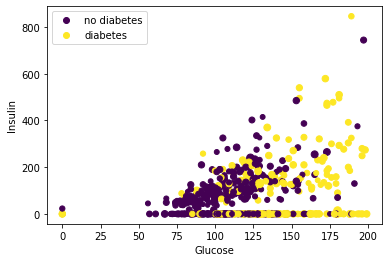

In [ ]:
plt.figure()
scatter = plt.scatter(X_train[:,1],X_train[:,4],c=y_train,s=X_train[:,5])
plt.xlabel(diabetes_data.keys()[1])
plt.ylabel(diabetes_data.keys()[4])
plt.legend(handles=scatter.legend_elements()[0], labels=('no diabetes','diabetes'))

## 8.2 Normalisierung

Skaliere die Trainings und Testdaten! Du kannst selbst eine Funktion implementieren oder vorimplementierte Funktionen aus sklearn verwenden.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 8.3 Training

Definiere und trainiere das Modell. Hier kannst du gerne mit den Parametern spielen um ein Gefühl für die Auswirkungen zu bekommen. Beginne mit 100 Trainings-Epochen.

In [ ]:
model = L_Layer_Perceptron([X_train.shape[1],15,5,1])
model.init_params()

train_model(X_train_scaled.T,y_train.reshape(1,-1),model,learning_rate=0.05,epochs=8000,cost_fun=BCE_cost)

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
ep 3000 cost 0.35969664811724616
ep 3001 cost 0.3596525997647576
ep 3002 cost 0.35964035768200353
ep 3003 cost 0.3596380734979949
ep 3004 cost 0.35959890411675294
ep 3005 cost 0.35958111570455475
ep 3006 cost 0.35955248853368676
ep 3007 cost 0.35954494592639513
ep 3008 cost 0.35951171933531934
ep 3009 cost 0.35949632361131234
ep 3010 cost 0.3594675189075035
ep 3011 cost 0.3594439860037855
ep 3012 cost 0.3594291598781609
ep 3013 cost 0.3593983421282745
ep 3014 cost 0.35938640258330407
ep 3015 cost 0.35935823064642913
ep 3016 cost 0.3593473237360221
ep 3017 cost 0.3593183986759064
ep 3018 cost 0.3593000047904828
ep 3019 cost 0.35928513791861216
ep 3020 cost 0.3592659560135282
ep 3021 cost 0.3592601200782943
ep 3022 cost 0.35921399307195223
ep 3023 cost 0.3592005976912489
ep 3024 cost 0.35916744314893084
ep 3025 cost 0.3591520843055072
ep 3026 cost 0.35913419596811674
ep 3027 cost 0.35912450699346504
ep 3028 cost 0.3591089

Hier kannst du die Güte deines Modells berechnen. Wir benutzen die Accuracy als Maß

$\text{acc} = \frac{\text{Anzahl korrekter Prädiktionen}}{\text{Gesamtzahl Prädiktionen}} =^{(1)} \frac{\text{TP}+\text{TN}}{\text{TP}+\text{TN}+\text{FP}+\text{FN}}$, (1) im Falle binärer Klassifikation (wie hier), wobei TP=True Positives, TN=True Negatives, FP=False Positives und FN=False Negatives

In [ ]:
def accuracy(y_pred,y,threshold=0.5):
  return np.sum((y_pred>threshold).reshape(-1)==y)/y.shape[0]

y_train_pred = model.forward_step(X_train_scaled.T)
train_accuracy = accuracy(y_train_pred,y_train)
print('Training Accuracy',train_accuracy)
y_test_pred = model.forward_step(X_test_scaled.T)
test_accuracy=accuracy(y_test_pred,y_test)
print('Test Accuracy',test_accuracy)

Training Accuracy 0.8957654723127035
Test Accuracy 0.6558441558441559


Was stellst du fest? Welche Parameter haben hier welchen Einfluss?

**Geschafft!**

Nun solltest du wissen wie Backpropagation funktioniert und wie man ein eigenes Multilayer-Perceptron mit beliebiger Anzahl Layern aufbauen und trainieren kann.
In der nächsten Übung werden wir uns mit einem Deep Learning Framework anhand eines weiteren medizinischen Problems beschäftigen.